In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
data = {
  'Name': ['Rob', 'Thomas', 'Nina', 'Mittal', 'Sofia', 'Mohan', 'Tao', 'Deepika', 'Rafiq', 'Smith'],
  'Height (ft)': [6.2, 5.7, 4.6, 5.4, 5.9, 4.3, 5.1, 5.2, 4.9, 9.0]
 }

In [137]:
df = pd.DataFrame(data)

In [138]:
df

,Name,Height (ft)
0,Rob,6.2
1,Thomas,5.7
2,Nina,4.6
3,Mittal,5.4
4,Sofia,5.9
5,Mohan,4.3
6,Tao,5.1
7,Deepika,5.2
8,Rafiq,4.9
9,Smith,9.0


<Axes: xlabel='Height (ft)', ylabel='Count'>

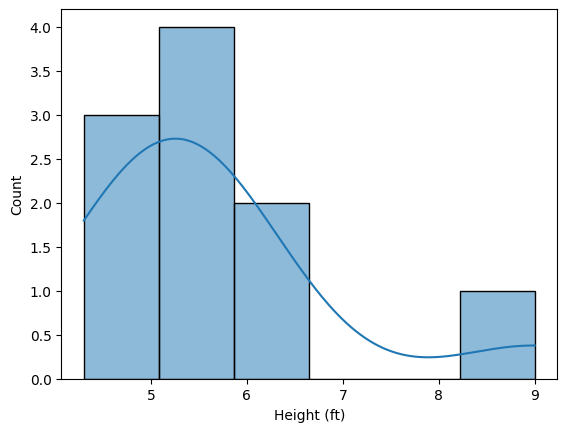

In [139]:
sns.histplot(df['Height (ft)'], kde=True)

In [140]:
df_new = df[df['Height (ft)'] < df['Height (ft)'].quantile(.99)]

In [141]:
df_new

,Name,Height (ft)
0,Rob,6.2
1,Thomas,5.7
2,Nina,4.6
3,Mittal,5.4
4,Sofia,5.9
5,Mohan,4.3
6,Tao,5.1
7,Deepika,5.2
8,Rafiq,4.9


<Axes: xlabel='Height (ft)', ylabel='Count'>

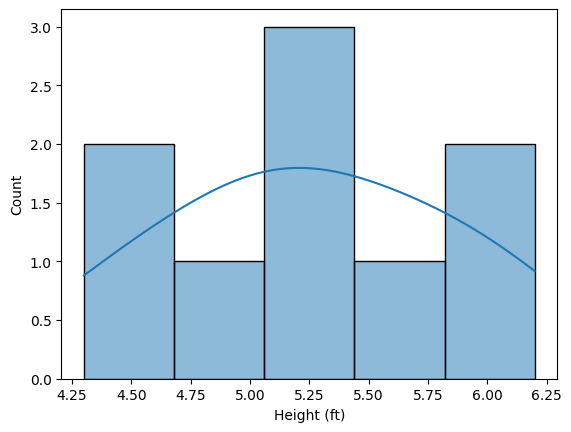

In [142]:
sns.histplot(df_new['Height (ft)'], kde=True)

(array([1., 1., 0., 1., 2., 1., 0., 1., 1., 1.]),
 array([4.3 , 4.49, 4.68, 4.87, 5.06, 5.25, 5.44, 5.63, 5.82, 6.01, 6.2 ]),
 <BarContainer object of 10 artists>)

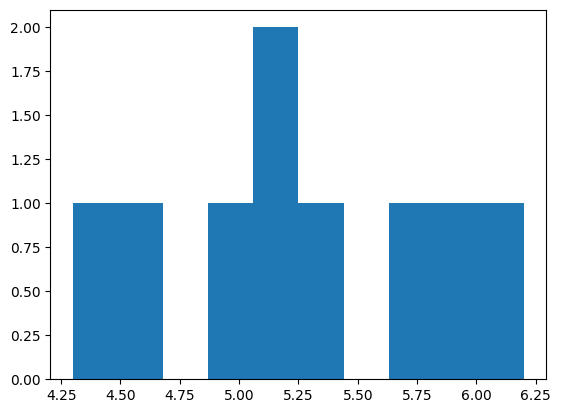

In [143]:
plt.hist(df_new['Height (ft)'])

In [144]:
df = pd.read_csv('weight-height.csv')

In [145]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [146]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

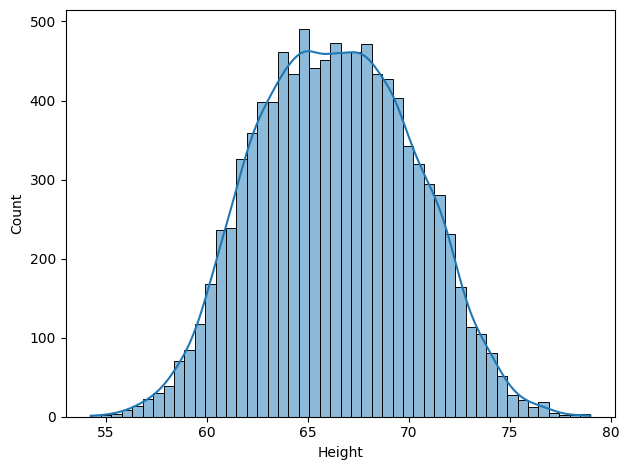

In [147]:
sns.histplot(df['Height'], kde=True)
plt.tight_layout()

In [148]:
mean_height = df['Height'].mean()

In [149]:
std_3_min = mean_height - 3*df['Height'].std()
std_3_min = float(std_3_min)
std_3_min

54.82497539250156

In [150]:
std_3_max = mean_height + 3*df['Height'].std()
std_3_max = float(std_3_max)
std_3_max

77.91014411714093

In [151]:
df_new = df[(df['Height'] > std_3_min) & (df['Height'] <= std_3_max)]

In [152]:
std_3_min, std_3_max

(54.82497539250156, 77.91014411714093)

In [153]:
df_new.sample(20)

,Gender,Height,Weight
6611,Female,63.595167,145.477540
5060,Female,59.608560,109.813156
2935,Male,70.403673,188.594408
3616,Male,69.566767,175.448595
5567,Female,63.238066,115.985361
8652,Female,59.836041,103.265961
9277,Female,65.107807,133.332513
9816,Female,65.031310,156.832881
180,Male,68.180731,181.056095
8446,Female,64.161818,157.909029


In [154]:
df_new.shape

(9993, 3)

In [155]:
df[df['Height'] > std_3_max]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


In [156]:
df[(df['Height'] < std_3_min) | (df['Height'] > std_3_max)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [157]:
df['Z-Score'] = (df['Height'] - df['Height'].mean())/df['Height'].std()

In [162]:
df

,Gender,Height,Weight,Z-Score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [158]:
df[df['Z-Score'] < -3]

,Gender,Height,Weight,Z-Score
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [159]:
df[df['Z-Score'] > 3]

,Gender,Height,Weight,Z-Score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [164]:
df_0 = df[(df['Z-Score'] > -3) & (df['Z-Score'] < 3)]

In [165]:
df_0.shape

(9993, 4)